Data set is from 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
# Importing libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import date
# Winsorising 
from scipy.stats.mstats import winsorize

# for Transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew
from scipy import stats

# sklearn regressions and modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
df = pd.read_csv('Data/UCI_Credit_Card.csv', index_col='ID')

In [33]:
columns = list(df.columns)
columns.remove('default.payment.next.month')
print(columns)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [28]:
y = df['default.payment.next.month']

In [34]:
X = df[columns]

In [35]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# EDA

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Visualisation

ValueError: num must be 1 <= num <= 9, not 10

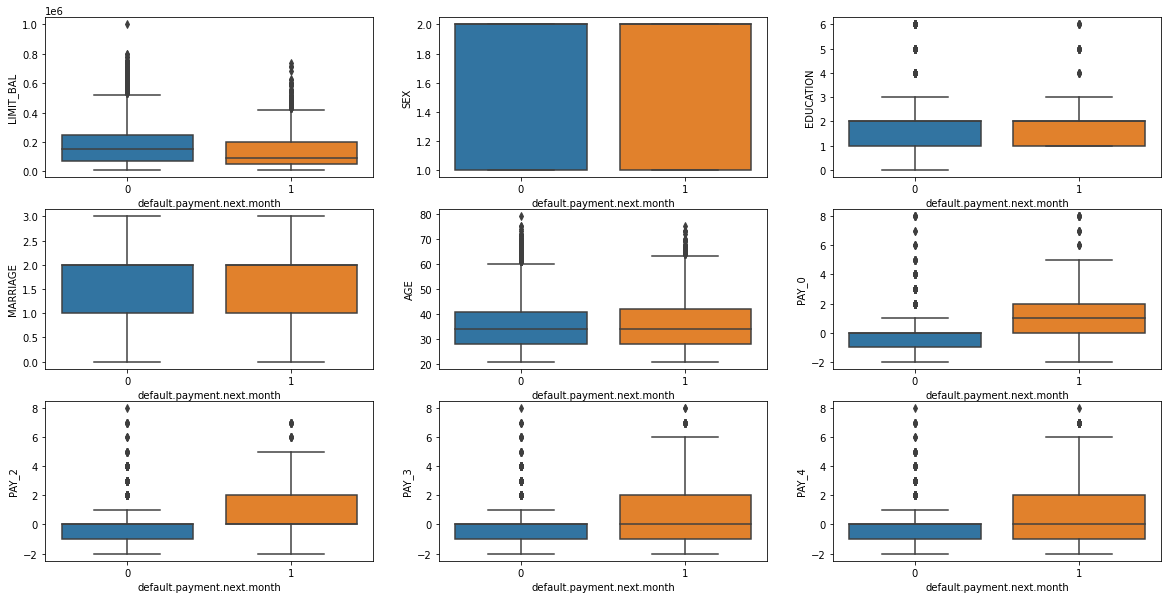

In [77]:
plt.figure(figsize=(20,10))
for i, c in enumerate(df.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x='default.payment.next.month', y=c, data=df)
plt.show()

<AxesSubplot:>

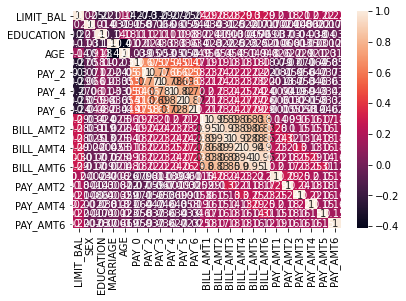

In [78]:
sns.heatmap(X.corr(), annot=True, fmt='.2g')

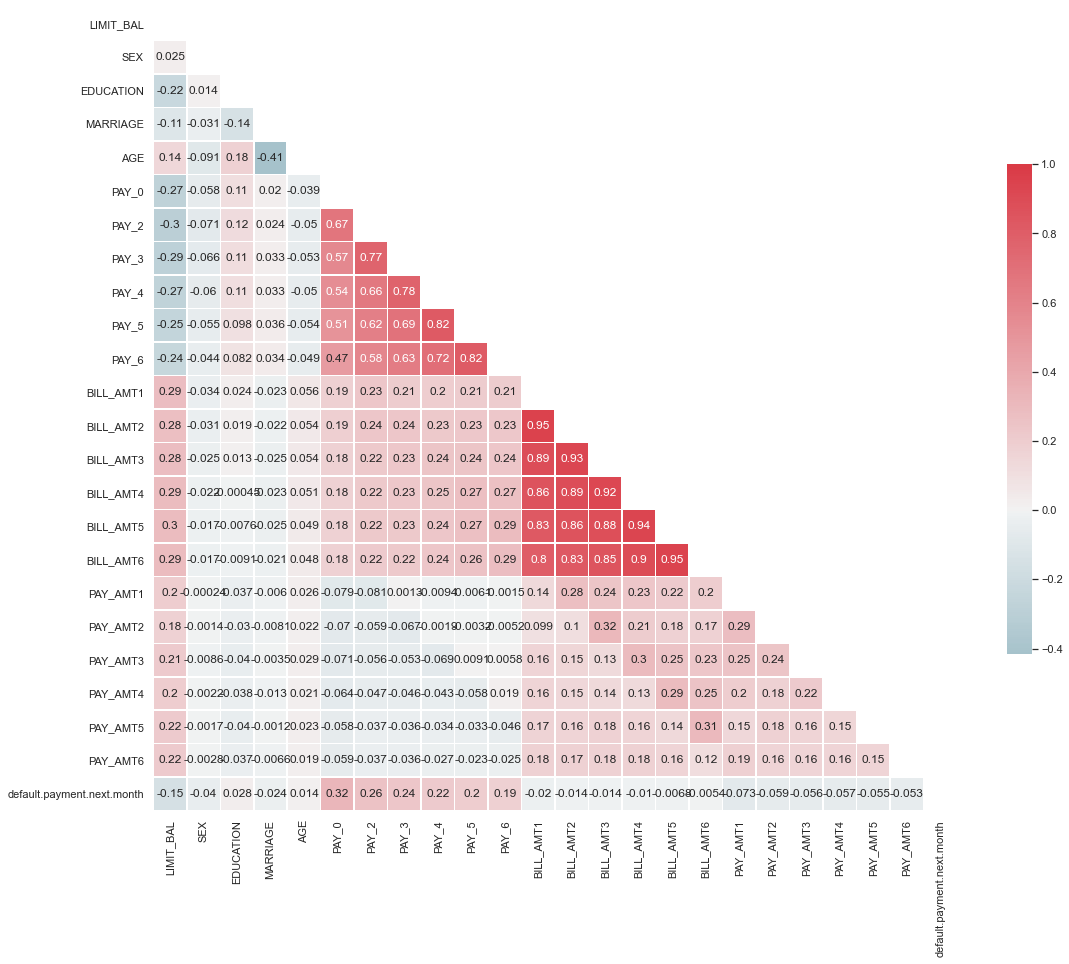

In [80]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [81]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [82]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

<AxesSubplot:>

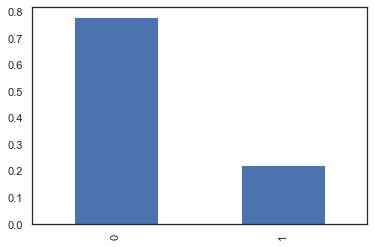

In [83]:
df['default.payment.next.month'].value_counts(normalize=True).plot(kind='bar')

In [84]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="default.payment.next.month", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

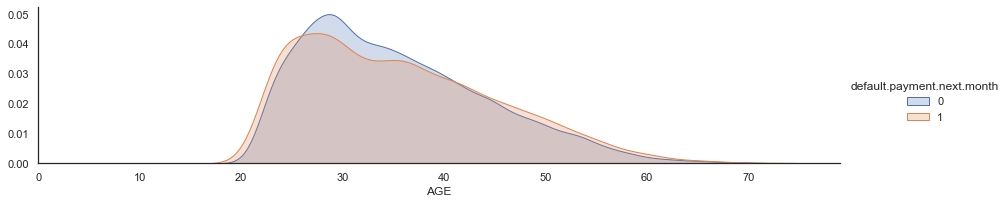

In [85]:
facetgridplot(df, 'AGE')

# Training and test data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Feature scaling

In [37]:
# feature scaling/ Data standardisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train_scaled)
# make sure to use transform not fit_transform for X_test
X_test_scaled = scaler.transform(X_test_scaled)

# Smote for under sampling

In [38]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# from matplotlib import pyplot
from numpy import where

In [39]:
counter = Counter(y)
print(counter)

Counter({0: 23364, 1: 6636})


In [40]:
# transform the dataset
oversample = SMOTE()

# using the normal data
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversample.fit_resample(X_test, y_test)

# using the scaled data
X_train_scaled_smote, y_train_scaled_smote = oversample.fit_resample(X_train_scaled, y_train)
X_test_scaled_smote, y_test_scaled_smote = oversample.fit_resample(X_test_scaled, y_test)

# summarize the new class distribution
counter = Counter(y_train_scaled_smote)
print(counter)
counter = Counter(y_test_scaled_smote)
print(counter)

Counter({0: 18677, 1: 18677})
Counter({0: 4687, 1: 4687})


# Regularisation

# Ridge Regression model

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [66]:
model = LinearRegression()
model.fit(X_train_scaled_smote, y_train_scaled_smote)

LinearRegression()

In [67]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train_scaled_smote, y_train_scaled_smote)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

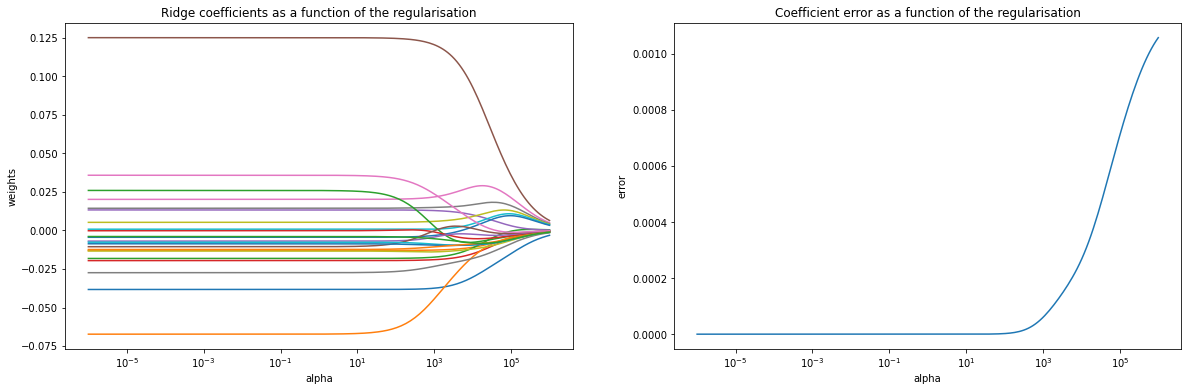

In [68]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [69]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_scaled_smote, y_train_scaled_smote)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_train_scaled_smote, y_train_scaled_smote))

Alpha: 79.34096665797492
Score: 0.15123968764198736


In [70]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

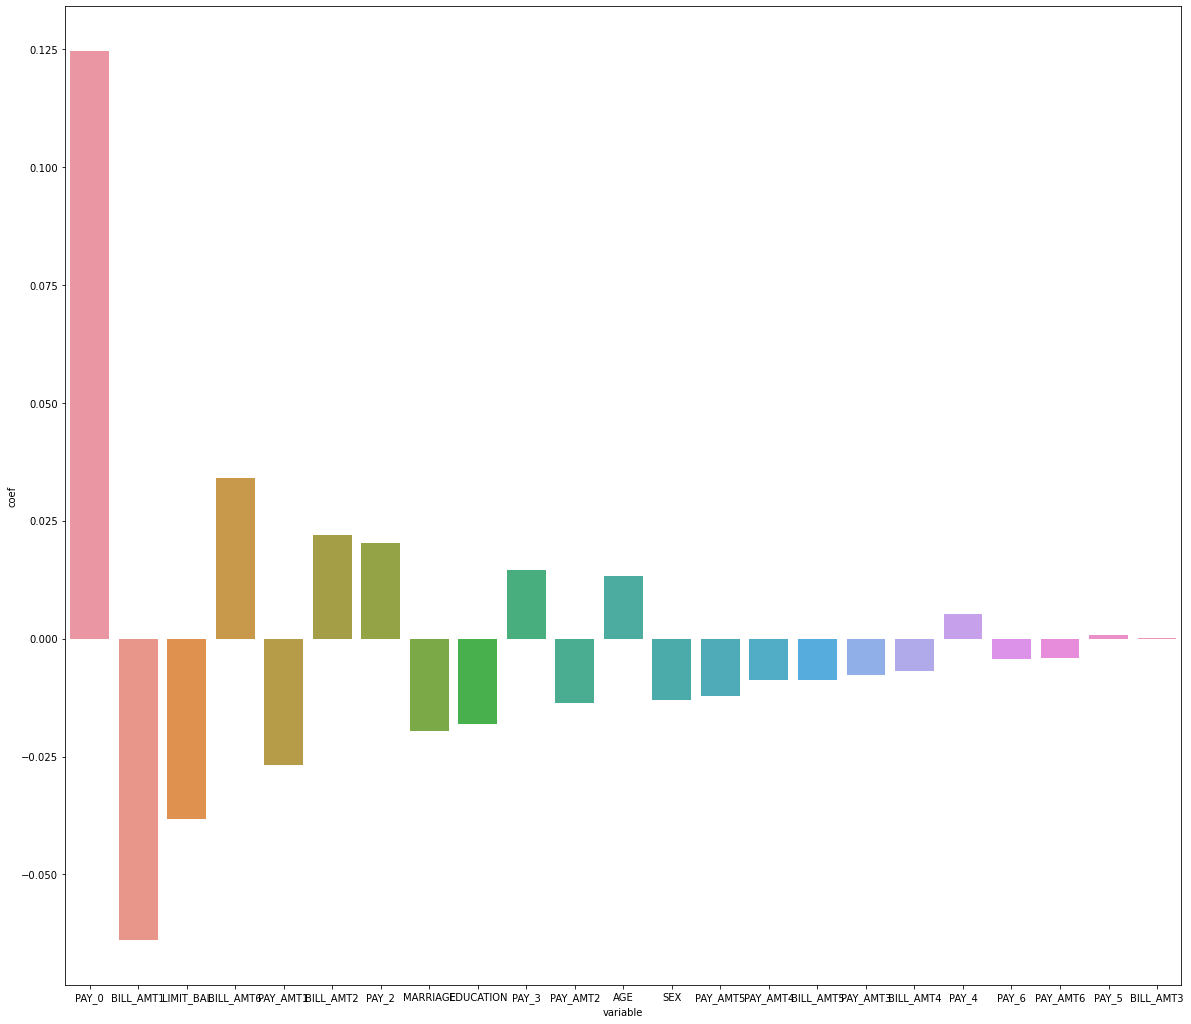

In [72]:
plt.figure(figsize=(20,18))
view_coeff(X, optimal_ridge)

# Lasso Regression model

In [73]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train_scaled_smote, y_train_scaled_smote)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

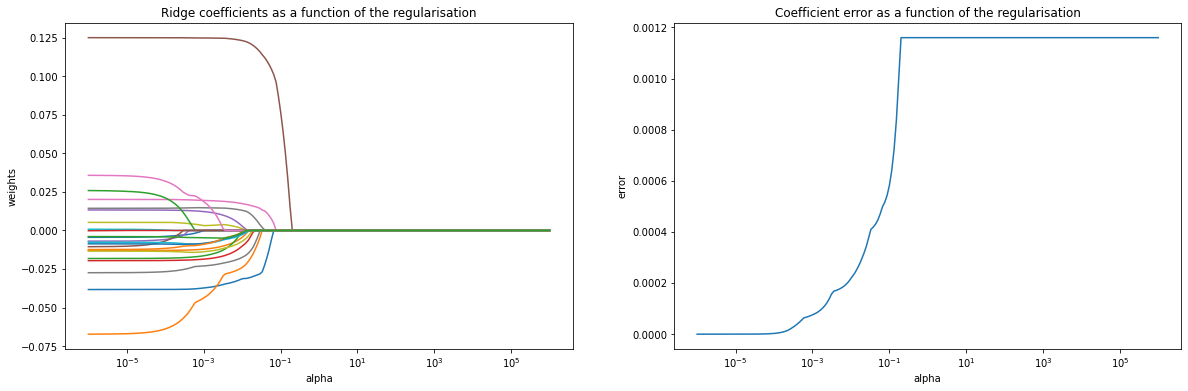

In [74]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [75]:
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_train_scaled_smote, y_train_scaled_smote)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_train_scaled_smote, y_train_scaled_smote))

Alpha: 1.217382727739662e-05
Score: 0.15124323204197265


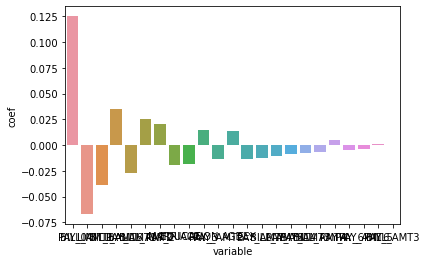

In [76]:
view_coeff(X, optimal_lasso)

# Define

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from scipy.stats import sem
from numpy import mean
from numpy import std

In [93]:
def output_results(X_train, X_test, y_train, y_test, model):
#     model = model
#     model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
#     # coefficients
#     for col in zip(X.columns, model.coef_[0]):
#         print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names
    
#     # intercepts
#     print("intercept = " + str(log_model.intercept_))

    # Score
    print("score = " + str(model.score(X_train, y_train)))
    
    # Accuracy score
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#     print((TP + TN) / float(TP + TN + FP + FN))
    
    # Recall
    print("Recall:",metrics.recall_score(y_test, y_pred))
#     print(metrics.recall_score(y_test, y_pred))
#     print(TP / float(TP + FN))

    # Precision
    print("Precision:",metrics.precision_score(y_test, y_pred))
#     print(metrics.precision_score(y_test, y_pred))
#     print(TP / float(TP + FP))

    # confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)
    print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
#     #[row, column]
#     TP = confusion[1, 1]
#     TN = confusion[0, 0]
#     FP = confusion[0, 1]
#     FN = confusion[1, 0]
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d");
    print(classification_report(y_test, y_pred))
    


In [44]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores    

In [45]:
def cross_validation_model(model, X_train, y_train):
    
#     model = model
#     model.fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("cv=5: ", scores.mean())
    
    # KFold
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('KFold - Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    # report ROC AUC
    results = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    # Reapeated KFold
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Repeated KFold - Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    # configurations to test
#     repeats = range(1,10)
#     results = list()
#     for r in repeats:
#         # evaluate using a given number of repeats
#         scores = evaluate_model(X_train, y_train, r)
#         # summarize
#         print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
#         # store
#         results.append(scores)
#     # plot the results
#     pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
#     pyplot.show()


# Logistic Regression Model

In [96]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_log_model = log_model.predict(X_test_scaled_smote)

score = 0.6754832146490336
Accuracy: 0.6817793898015788
Recall: 0.6680179219116705
Precision: 0.6869240895129443
[[3260 1427]
 [1556 3131]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      4687
           1       0.69      0.67      0.68      4687

    accuracy                           0.68      9374
   macro avg       0.68      0.68      0.68      9374
weighted avg       0.68      0.68      0.68      9374



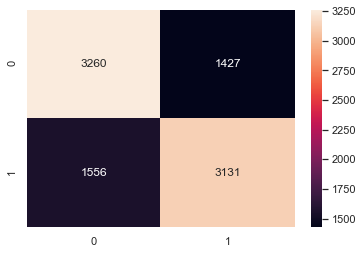

In [97]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               log_model)

In [98]:
cross_validation_model(log_model, X_train_scaled_smote, y_train_scaled_smote)

cv=5:  0.6748673218730452
KFold - Accuracy: 0.675 (0.007)
AUC: 0.730 (0.008)
Repeated KFold - Accuracy: 0.675 (0.008)


In [99]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log_model = log_model.predict(X_test_scaled)

score = 0.8107083333333334
Accuracy: 0.8098333333333333
Recall: 0.2361005331302361
Precision: 0.6919642857142857
[[4549  138]
 [1003  310]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



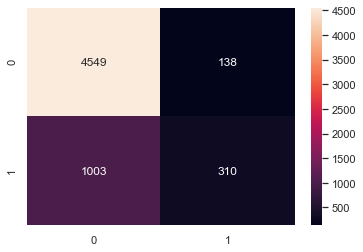

In [100]:
output_results(X_train_scaled, X_test_scaled, y_train, y_test, 
               log_model)

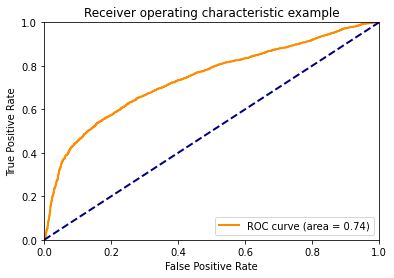

In [50]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machines

In [51]:
from sklearn import svm
from sklearn.datasets import make_blobs

In [52]:
# fit the model, without regularisation (make C large):
svc_model = svm.SVC(kernel = 'linear', probability=True)
svc_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_svc_model = svc_model.predict(X_test_scaled_smote)

score = 0.6859774053648873
Accuracy: 0.6888201408150203
Recall: 0.5525922765094944
Precision: 0.7595307917888563
[[3867  820]
 [2097 2590]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      4687
           1       0.76      0.55      0.64      4687

    accuracy                           0.69      9374
   macro avg       0.70      0.69      0.68      9374
weighted avg       0.70      0.69      0.68      9374



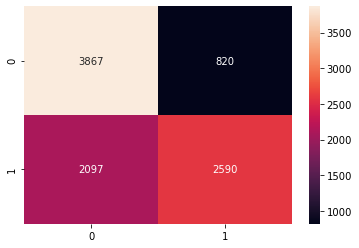

In [53]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               svc_model)

In [ ]:
cross_validation_model(svc_model, 
                       X_train_scaled_smote, y_train_scaled_smote)

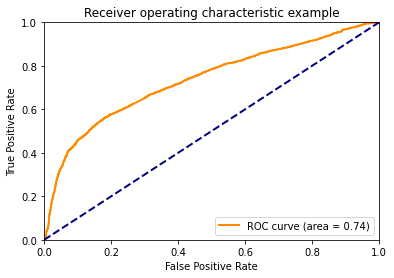

In [54]:
y_pred = svc_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
NB_model = GaussianNB()
NB_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_NB_model = NB_model.predict(X_test_scaled_smote)

score = 0.593778444075601
Accuracy: 0.6015574994666097
Recall: 0.8888414764241519
Precision: 0.5644986449864499
[[1473 3214]
 [ 521 4166]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.74      0.31      0.44      4687
           1       0.56      0.89      0.69      4687

    accuracy                           0.60      9374
   macro avg       0.65      0.60      0.57      9374
weighted avg       0.65      0.60      0.57      9374



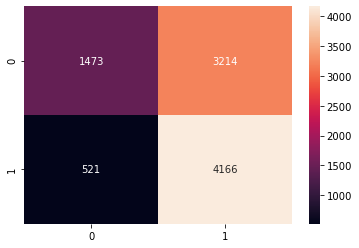

In [57]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               NB_model)

In [58]:
cross_validation_model(GaussianNB(), 
                       X_train_scaled_smote, y_train_scaled_smote)

cv=5:  0.5935910043600987
KFold - Accuracy: 0.593 (0.009)
AUC: 0.736 (0.005)
Repeated KFold - Accuracy: 0.593 (0.009)


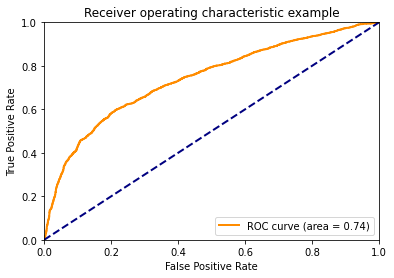

In [59]:
y_pred = NB_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# ROC curve all together

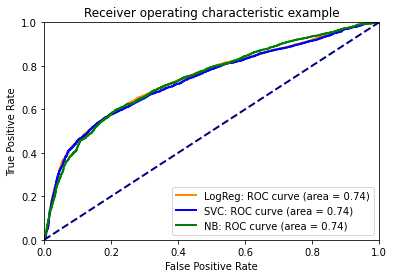

In [60]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_model.predict_proba(X_test_scaled_smote)[:,1]
preds_svc = svc_model.predict_proba(X_test_scaled_smote)[:,1]
preds_nb = NB_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, preds)
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test_scaled_smote, preds_svc)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test_scaled_smote, preds_nb)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'LogReg: ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_svc, tpr_svc, color='blue', lw = lw, label = 'SVC: ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_nb, tpr_nb, color='green', lw = lw, label = 'NB: ROC curve (area = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Gridsearch

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X_train_scaled_smote, y_train_scaled_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [63]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.6749208693964723


In [ ]:
# gridsearch SVM
from sklearn.grid_search import GridSearchCV

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X, y)

In [ ]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)